# <font color = '#000000'><center> <b>Electrical Faults Detection and Classsification</b> </center>

### What are Electrical Faults?
> Normally, a power system operates under balanced conditions. When the system becomes unbalanced due to the failures of insulation at any point or due to the contact of live wires, a short–circuit or fault, is said to occur in the line. Faults may occur in the power system due to the number of reasons like natural disturbances (lightning, high-speed winds, earthquakes), insulation breakdown, falling of a tree, bird shorting, etc.


### Types of Faults?
> Faults can be brodly categorised into two types:
> 1. Open-circuit Fault and
> 2. Short-Circuit Faults
    * Symmetrical and 
    * Asymmetrical Faults
    
### Symmetrical and Asymmetrical Faults
> #### Symmetrical 
> * In symmetrical faults, all phases are shorted to each other or to earth (L-L-L) or (L-L-L-G).
> * The nature of this type of fault is balanced.
> * In this type of fault,fault currents in all phases are symmetrical i.e. their magnitudes are equal and they are equally displaced by angle 120 degree.
> * It is more severe type of fault but it occurs rarely.

> #### Asymmetrical 
> * These faults involve only one or two phases.
> * In this type of fault, three phase lines become unbalanced.
> * There are mainly three types namely line to ground (L-G), line to line (L-L) and double line to ground (LL-G) faults.
> * These type of faults mostly occur on power system..

<br>
So here we are trying to classify Short-Circuit faults into further categories based on the values of line voltages and Line Currents.
<br><br>
<center> 
    <img src="https://semelectrical.com/wp-content/uploads/2016/12/fault-finding-3.jpg" width="800" height="200"> 
</center>
<b>Source of Information : Kaggle</b>

### Importing Necessary Libraries

In [165]:
# Data Analysis and Plotting Libraries
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='darkgrid')
sns.set(font_scale=1.25)
import plotly.express as px

# Machine Learning and Model Building Libraries
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier

from sklearn import metrics

In [166]:
detectData = pd.read_csv("datasets/detect_dataset.csv")
classData = pd.read_csv("datasets/classData.csv")

### View of Datasets

In [167]:
detectData.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc,Unnamed: 7,Unnamed: 8
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431,NaN,NaN
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202,NaN,NaN
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251,NaN,NaN
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963,NaN,NaN
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050,NaN,NaN


In [168]:
classData.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983


#### So we have two files of datasets here namely :
* **detectData** is to train the model to Detect Any Type of Faults and<br>
* **classData** is for Classification of Shunt Faults.


**The file "detectData" contains the dataset to classify the types of fault.**<br>

> A,B,C are the 3-phases of the electrical system. Most of the Electricity transmission happens via 3-phase system,<br>
and hence **Ia** represents the current(I) in phase A, **Va** represents the Voltage(V) in phase A and so on for Phase A and B.

Inputs - [Ia,Ib,Ic,Va,Vb,Vc]<br>
Outputs - [G C B A]<br>

**Examples :<br>
[0 0 0 0] - No Fault<br>
[1 0 0 1] - LG fault (Between Phase A and Gnd)<br>
[0 0 1 1] - LL fault (Between Phase A and Phase B)<br>
[1 0 1 1] - LLG Fault (Between Phases A,B and ground)<br>
[0 1 1 1] - LLL Fault(Between all three phases)<br>
[1 1 1 1] - LLLG fault( Three phase symmetrical fault)<br>**

In [169]:
# Dropping the last 2 unnecessary columns from detectData dataset.

detectData = detectData.drop(detectData[['Unnamed: 7', 'Unnamed: 8']],axis=1)
detectData.head()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
0,0,-170.472196,9.219613,161.252583,0.054490,-0.659921,0.605431
1,0,-122.235754,6.168667,116.067087,0.102000,-0.628612,0.526202
2,0,-90.161474,3.813632,86.347841,0.141026,-0.605277,0.464251
3,0,-79.904916,2.398803,77.506112,0.156272,-0.602235,0.445963
4,0,-63.885255,0.590667,63.294587,0.180451,-0.591501,0.411050


In [170]:
# detectData
print(f"The Detect Dataset has {detectData.shape[0]} rows and {detectData.shape[1]} columns.")

# classData
print(f"The Class Dataset has {classData.shape[0]} rows and {classData.shape[1]} columns.")

The Detect Dataset has 12001 rows and 7 columns.
The Class Dataset has 7861 rows and 10 columns.


### Data Types & Values of our Datasets

In [171]:
# About detectData
detectData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12001 entries, 0 to 12000
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Output (S)  12001 non-null  int64  
 1   Ia          12001 non-null  float64
 2   Ib          12001 non-null  float64
 3   Ic          12001 non-null  float64
 4   Va          12001 non-null  float64
 5   Vb          12001 non-null  float64
 6   Vc          12001 non-null  float64
dtypes: float64(6), int64(1)
memory usage: 656.4 KB


In [172]:
# About classData
classData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7861 entries, 0 to 7860
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   G       7861 non-null   int64  
 1   C       7861 non-null   int64  
 2   B       7861 non-null   int64  
 3   A       7861 non-null   int64  
 4   Ia      7861 non-null   float64
 5   Ib      7861 non-null   float64
 6   Ic      7861 non-null   float64
 7   Va      7861 non-null   float64
 8   Vb      7861 non-null   float64
 9   Vc      7861 non-null   float64
dtypes: float64(6), int64(4)
memory usage: 614.3 KB


##### Note: We have no NULL values in our Datasets

### Mathematically Describe our Datasets

In [173]:
# Description of detectData

detectData.describe()

,Output (S),Ia,Ib,Ic,Va,Vb,Vc
count,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000,12001.000000
mean,0.457962,6.709369,-26.557793,22.353043,0.010517,-0.015498,0.004980
std,0.498250,377.158470,357.458613,302.052809,0.346221,0.357644,0.349272
min,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.659921,-0.612709
25%,0.000000,-64.348986,-51.421937,-54.562257,-0.237610,-0.313721,-0.278951
50%,0.000000,-3.239788,4.711283,-0.399419,0.002465,-0.007192,0.008381
75%,1.000000,53.823453,69.637787,45.274542,0.285078,0.248681,0.289681
max,1.000000,885.738571,889.868884,901.274261,0.609864,0.627875,0.608243


In [174]:
# Description of classData

classData.describe()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc
count,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000,7861.000000
mean,0.432006,0.411271,0.555527,0.571429,13.721194,-44.845268,34.392394,-0.007667,0.001152,0.006515
std,0.495387,0.492095,0.496939,0.494903,464.741671,439.269195,371.107412,0.289150,0.313437,0.307897
min,0.000000,0.000000,0.000000,0.000000,-883.542316,-900.526951,-883.357762,-0.620748,-0.608016,-0.612709
25%,0.000000,0.000000,0.000000,0.000000,-119.802518,-271.845947,-61.034219,-0.130287,-0.159507,-0.215977
50%,0.000000,0.000000,1.000000,1.000000,2.042805,5.513317,-4.326711,-0.005290,0.001620,0.009281
75%,1.000000,1.000000,1.000000,1.000000,227.246377,91.194282,49.115141,0.111627,0.153507,0.239973
max,1.000000,1.000000,1.000000,1.000000,885.738571,889.868884,901.274261,0.595342,0.627875,0.600179


### Checking for Duplicate Values

In [175]:
print(f"Dataset Detect has {detectData.duplicated().sum()} duplicate values.")
print(f"Dataset Classify has {classData.duplicated().sum()} duplicate values.")

Dataset Detect has 0 duplicate values.
Dataset Classify has 0 duplicate values.


##### Note: We have no DUPLICATE values in our Datasets

### Value Counts of Output (S) in detectData dataset

0    6505
1    5496
Name: Output (S), dtype: int64


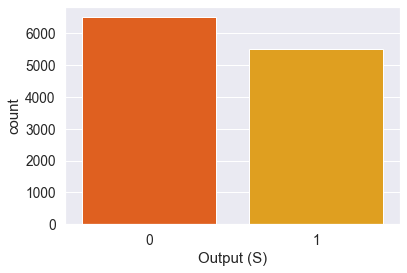

In [176]:
print(detectData['Output (S)'].value_counts())
sns.countplot(x=detectData['Output (S)'], palette='autumn')
plt.show()

### Graphical Analysis of detectData dataset

In [177]:
# Ia vs Va for Line A

fig = px.line(detectData, x = "Ia", y = "Va", title="For Line A", color = "Output (S)")
fig.show()

In [178]:
# Ib vs Vb for Line B

fig = px.line(detectData, x = "Ib", y = "Vb", title="For Line B", color = "Output (S)")
fig.show()

In [179]:
# Ic vs Vc for Line C

fig = px.line(detectData, x = "Ic", y = "Vc", title="For Line C", color = "Output (S)")
fig.show()

### Making a new column "fault_types" in classData dataset

In [132]:
classData['fault_types'] = classData['G'].astype('str') + classData['C'].astype('str') + classData['B'].astype('str') + \
classData['A'].astype('str')

classData.head()

,G,C,B,A,Ia,Ib,Ic,Va,Vb,Vc,fault_types
0,1,0,0,1,-151.291812,-9.677452,85.800162,0.400750,-0.132935,-0.267815,1001
1,1,0,0,1,-336.186183,-76.283262,18.328897,0.312732,-0.123633,-0.189099,1001
2,1,0,0,1,-502.891583,-174.648023,-80.924663,0.265728,-0.114301,-0.151428,1001
3,1,0,0,1,-593.941905,-217.703359,-124.891924,0.235511,-0.104940,-0.130570,1001
4,1,0,0,1,-643.663617,-224.159427,-132.282815,0.209537,-0.095554,-0.113983,1001


### Value Counts of fault_types in classData

0000    2365
1011    1134
1111    1133
1001    1129
0111    1096
0110    1004
Name: fault_types, dtype: int64


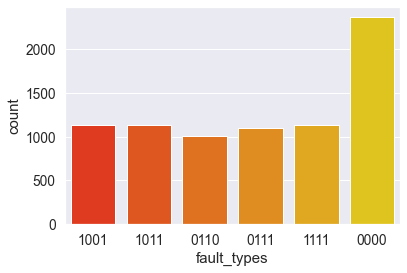

In [133]:
print(classData['fault_types'].value_counts())
sns.countplot(x=classData['fault_types'], palette='autumn')
plt.show()

### Type of Fault Distribution from classData dataset with Pie Chart

[G C B A]
[0 0 0 0] -> No fault 
[1 0 0 1] -> LG fault
[0 1 1 0] -> LL fault
[1 0 1 1] -> LLG Fault
[0 1 1 1] -> LLL Fault
[1 1 1 1] -> LLLG fault



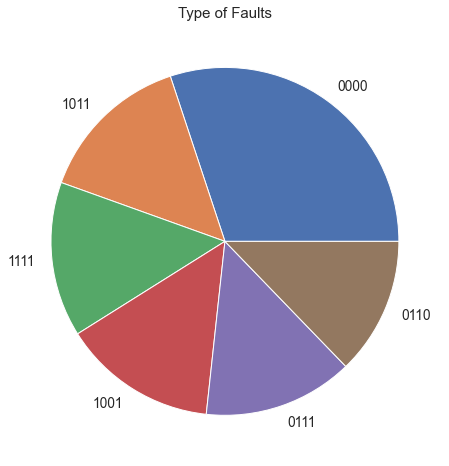

In [134]:
print("[G C B A]\n[0 0 0 0] -> No fault \n[1 0 0 1] -> LG fault\n[0 1 1 0] -> LL fault\n[1 0 1 1] -> " + 
      "LLG Fault\n[0 1 1 1] -> LLL Fault\n[1 1 1 1] -> LLLG fault\n")
plt.figure(figsize=(8,8))
classData.fault_types.value_counts().plot.pie()
plt.title("Type of Faults")
plt.ylabel("")
plt.show()

# Machine Learning model with detectData and classData datasets

In [135]:
# Scaling detectData dataset
detect_ip = detectData.drop(columns=['Output (S)'], axis=1)
dipc = detect_ip.columns

mms = MinMaxScaler()
df_detect_ip = mms.fit_transform(detect_ip)

detect_ip = pd.DataFrame(df_detect_ip, columns=dipc)

detect_op = detectData.iloc[:,0]

In [136]:
detect_ip.head(3)

,Ia,Ib,Ic,Va,Vb,Vc
0,0.403028,0.508126,0.585337,0.548701,0.000000,0.997697
1,0.430292,0.506422,0.560017,0.587308,0.024312,0.932806
2,0.448420,0.505107,0.543364,0.619020,0.042432,0.882066


In [137]:
detect_op.head(3)

0    0
1    0
2    0
Name: Output (S), dtype: int64

In [138]:
# Scaling classData dataset
class_ip = classData.drop(columns=['G','C','B','A','fault_types'], axis=1)
cipc = class_ip.columns

mms = MinMaxScaler()
df_class_ip = mms.fit_transform(class_ip)

class_ip = pd.DataFrame(df_class_ip, columns=cipc)

class_op = classData['fault_types']

In [139]:
class_ip.head(3)

,Ia,Ib,Ic,Va,Vb,Vc
0,0.413869,0.497571,0.543058,0.839985,0.384404,0.284358
1,0.309366,0.460370,0.505251,0.767607,0.391930,0.349258
2,0.215144,0.405429,0.449635,0.728956,0.399481,0.380317


In [140]:
class_op.head(3)

0    1001
1    1001
2    1001
Name: fault_types, dtype: object

In [141]:
# Splitting Data on detectData 
detectData_train_x, detectData_test_x, detectData_train_y, detectData_test_y = \
train_test_split(detect_ip, detect_op, test_size=0.20, random_state=42)

# Splitting Data on classData
classData_train_x, classData_test_x, classData_train_y, classData_test_y = \
train_test_split(class_ip, class_op, test_size=0.20, random_state=42)

## Model 1 : Decision Tree

In [142]:
# Model Building
dtc = DecisionTreeClassifier(criterion='gini', ccp_alpha=0.0012)

### For Fault Detection (detectData Dataset)

Score: 99.001 %


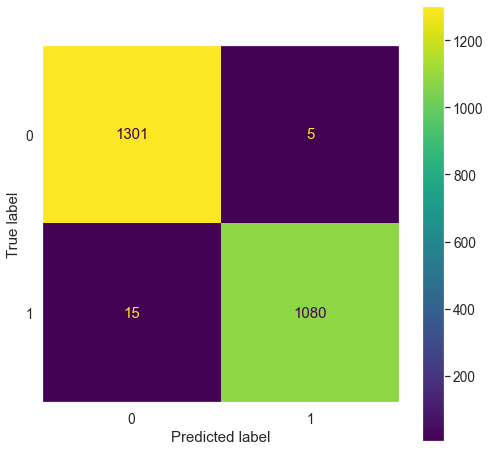

In [143]:
dtc.fit(detectData_train_x, detectData_train_y)
dtc_scores = cross_val_score(dtc, detectData_test_x, detectData_test_y, cv=10)
final_det_dtc = round(np.mean(dtc_scores)*100, 3)
print("Score:", final_det_dtc, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(dtc, detectData_test_x, detectData_test_y, ax=ax)

plt.grid(False)
plt.show()

### For Fault Type Detection (classData Dataset)

Score: 84.107 %


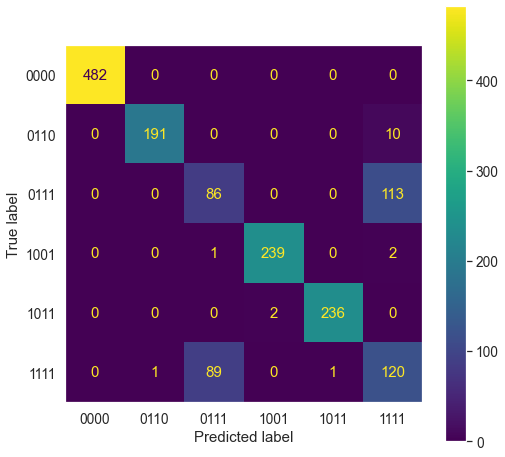

In [144]:
dtc.fit(classData_train_x, classData_train_y)
dtc_scores = cross_val_score(dtc, classData_test_x, classData_test_y, cv=10)
final_cls_dtc = round(np.mean(dtc_scores)*100, 3)
print("Score:", final_cls_dtc, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(dtc, classData_test_x, classData_test_y, ax=ax)

plt.grid(False)
plt.show();

## Model 2 : Random Forest

In [145]:
# Model Building
rfclf = RandomForestClassifier(max_depth=10, min_samples_leaf=20, min_samples_split=30, n_estimators=20)

### For Fault Detection (detectData dataset)

Score: 99.126 %


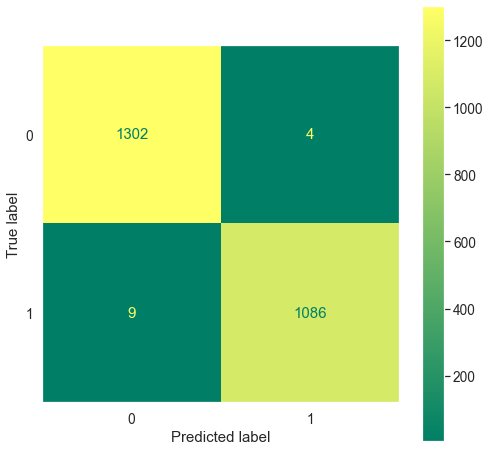

In [146]:
rfclf.fit(detectData_train_x, detectData_train_y)
rfclf_scores = cross_val_score(rfclf, detectData_test_x, detectData_test_y, cv=10)
final_det_rf = round(np.mean(rfclf_scores)*100, 3)
print("Score:", final_det_rf, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(rfclf, detectData_test_x, detectData_test_y, cmap='summer', ax=ax)

plt.grid(False)
plt.show();

### For Fault Type Detection (classData Dataset)

Score: 81.629 %


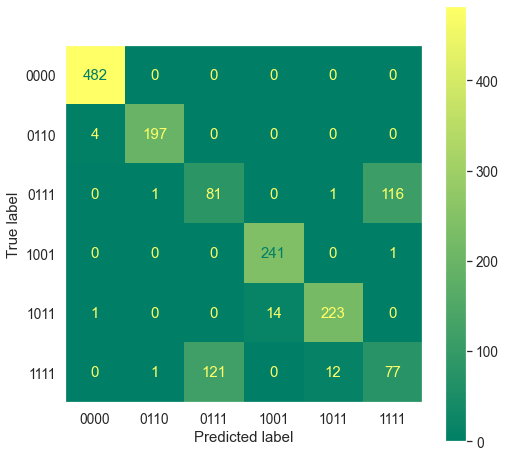

In [147]:
rfclf.fit(classData_train_x, classData_train_y)
rfclf_scores = cross_val_score(rfclf, classData_test_x, classData_test_y, cv=10)
final_cls_rf = round(np.mean(rfclf_scores)*100, 3)
print("Score:", final_cls_rf, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(rfclf, classData_test_x, classData_test_y, cmap='summer', ax=ax)

plt.grid(False)
plt.show();

## Model 3 : AdaBoost

In [148]:
# Model Building
ab = AdaBoostClassifier(n_estimators=100)

### For Fault Detection (detectData Dataset)

Score: 99.334 %


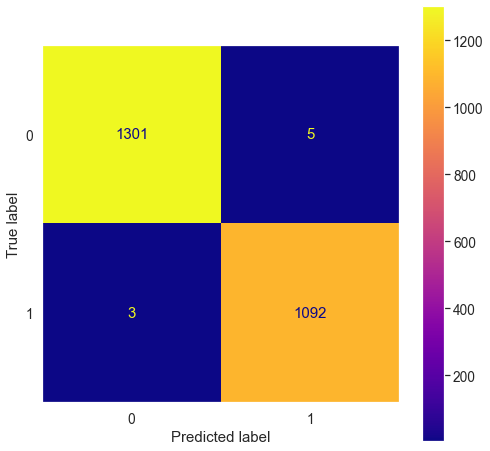

In [149]:
ab.fit(detectData_train_x, detectData_train_y)
ab_scores = cross_val_score(ab, detectData_test_x, detectData_test_y, cv=10)
final_det_ab = round(np.mean(ab_scores)*100, 3)
print("Score:", final_det_ab, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(ab, detectData_test_x, detectData_test_y, cmap='plasma', ax=ax)

plt.grid(False)
plt.show();

### For Fault Type Detection (classData Dataset)

Score: 68.221 %


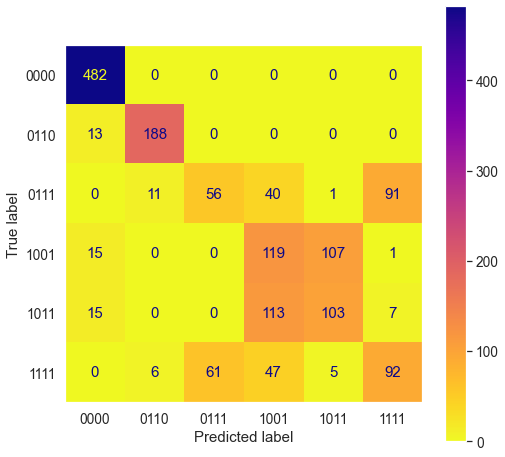

In [150]:
ab.fit(classData_train_x, classData_train_y)
ab_scores = cross_val_score(ab, classData_test_x, classData_test_y, cv=10)
final_cls_ab = round(np.mean(ab_scores)*100, 3)
print("Score:", final_cls_ab, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(ab, classData_test_x, classData_test_y, cmap='plasma_r', ax=ax)

plt.grid(False)
plt.show();

## Model 4 : SVC

In [151]:
# Model Building
svc = SVC(kernel='poly', degree=10)

### For Fault Detection (detectData Dataset)

Score: 99.459 %


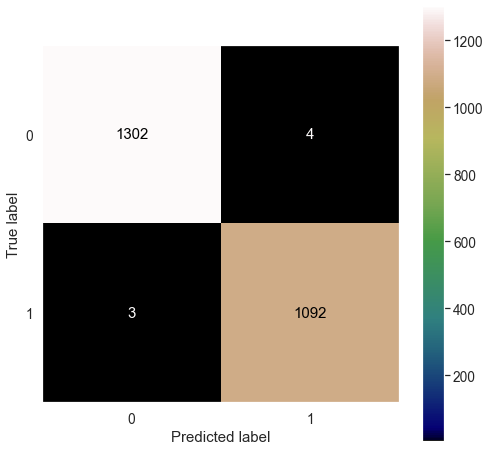

In [152]:
svc.fit(detectData_train_x, detectData_train_y)
svc_scores = cross_val_score(svc, detectData_test_x, detectData_test_y, cv=10)
final_det_svc = round(np.mean(svc_scores)*100, 3)
print("Score:", final_det_svc, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(svc, detectData_test_x, detectData_test_y, cmap='gist_earth', ax=ax)

plt.grid(False)
plt.show();

### For Fault Type Detection (classData Dataset)

Score: 98.92 %


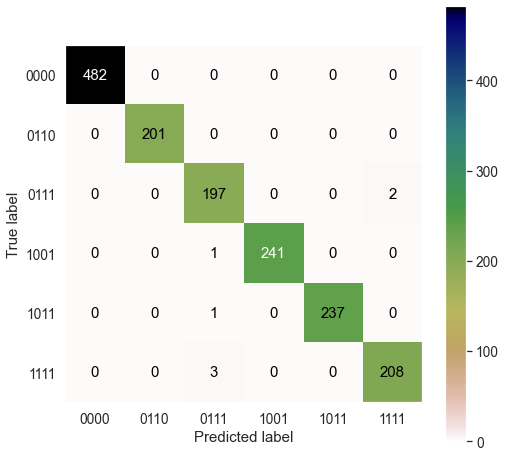

In [153]:
svc.fit(classData_train_x, classData_train_y)
svc_scores = cross_val_score(svc, classData_test_x, classData_test_y, cv=10)
final_cls_svc = round(np.mean(svc_scores)*100, 3)
print("Score:", final_cls_svc, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(svc, classData_test_x, classData_test_y, cmap='gist_earth_r', ax=ax)

plt.grid(False)
plt.show();

## Model 5 : MLP Classifiers (CNN)

In [154]:
# model building
mlp = MLPClassifier(hidden_layer_sizes=(150,100,50), max_iter=300, activation = 'relu', solver='adam', random_state=1)

### For Fault Detection (detectData Dataset)

Score: 99.417 %


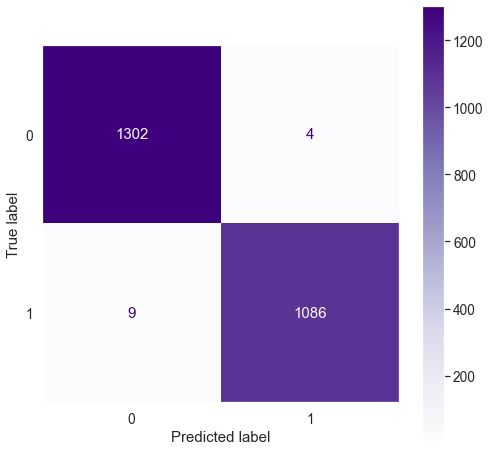

In [155]:
mlp.fit(detectData_train_x, detectData_train_y)
mlp_scores = cross_val_score(mlp, detectData_test_x, detectData_test_y, cv=10)
final_det_mlp = round(np.mean(mlp_scores)*100, 3)
print("Score:", final_det_mlp, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(mlp, detectData_test_x, detectData_test_y, cmap='Purples', ax=ax)

plt.grid(False)
plt.show();

### For Fault Type Detection (classData Dataset)

Score: 82.965 %


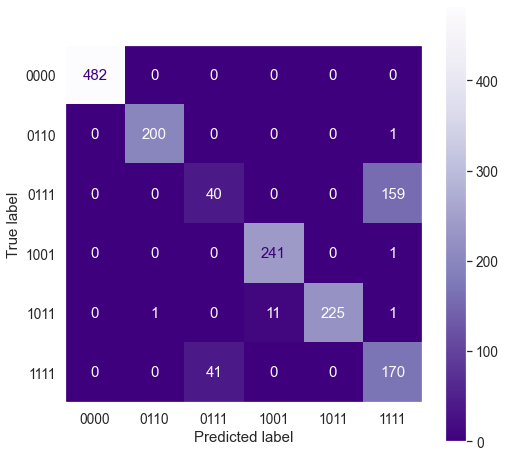

In [156]:
mlp.fit(classData_train_x, classData_train_y)
mlp_scores = cross_val_score(mlp, classData_test_x, classData_test_y, cv=10)
final_cls_mlp = round(np.mean(mlp_scores)*100, 3)
print("Score:", final_cls_mlp, "%")

# Confusion Matrix
fig, ax = plt.subplots(figsize=(8, 8))
metrics.plot_confusion_matrix(mlp, classData_test_x, classData_test_y, cmap='Purples_r', ax=ax)

plt.grid(False)
plt.show();

## Analysis of Scores of Models and Find The Best One

In [157]:
# Model Name in List
names = ['Decision Tree', 'Random Forest', 'AdaBoost', 'SVC', 'MLP Classifier']

# Score Values of Fault Detection in List
det_scores = [final_det_dtc, final_det_rf, final_det_ab, final_det_svc, final_det_mlp]

# Score Values of Fault Type Detection in List
cls_scores = [final_cls_dtc, final_cls_rf, final_cls_ab, final_cls_svc, final_cls_mlp]

In [158]:
# Create Dataframe of Model Performance
df = pd.DataFrame()
df['model_name'] = names
df['fault_detection_score'] = det_scores
df['fault_type_detection_score'] = cls_scores
df

,model_name,fault_detection_score,fault_type_detection_score
0,Decision Tree,99.001,84.107
1,Random Forest,99.126,81.629
2,AdaBoost,99.334,68.221
3,SVC,99.459,98.920
4,MLP Classifier,99.417,82.965


In [159]:
# Adding Colours for better Clarification
col = sns.light_palette("green", as_cmap=True)
color_df = df.style.background_gradient(cmap=col)
color_df

,model_name,fault_detection_score,fault_type_detection_score
0,Decision Tree,99.001000,84.107000
1,Random Forest,99.126000,81.629000
2,AdaBoost,99.334000,68.221000
3,SVC,99.459000,98.920000
4,MLP Classifier,99.417000,82.965000


### ** In above, The Deepest Color depicting the highest values of Model Scores **

## Barplot of Model Performance

In [160]:
def show_values(axs, orient="v", space=.01):
    def _single(ax):
        if orient == "v":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() / 2
                _y = p.get_y() + p.get_height() + (p.get_height()*0.01)
                value = '{:.1f}'.format(p.get_height())
                ax.text(_x, _y, value, ha="center") 
        elif orient == "h":
            for p in ax.patches:
                _x = p.get_x() + p.get_width() + float(space)
                _y = p.get_y() + p.get_height() - (p.get_height()*0.5)
                value = '{:.1f}'.format(p.get_width())
                ax.text(_x, _y, value, ha="left")

    if isinstance(axs, np.ndarray):
        for idx, ax in np.ndenumerate(axs):
            _single(ax)
    else:
        _single(axs)

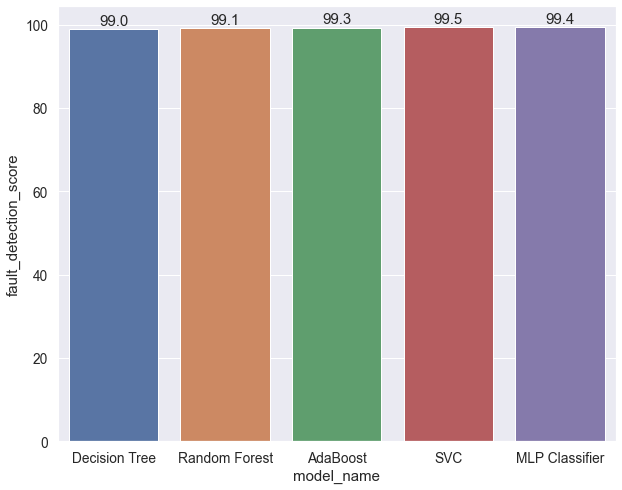

In [161]:
# Bar plot for Fault Detection (detectData)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x="model_name", y="fault_detection_score", data=df)
show_values(ax)

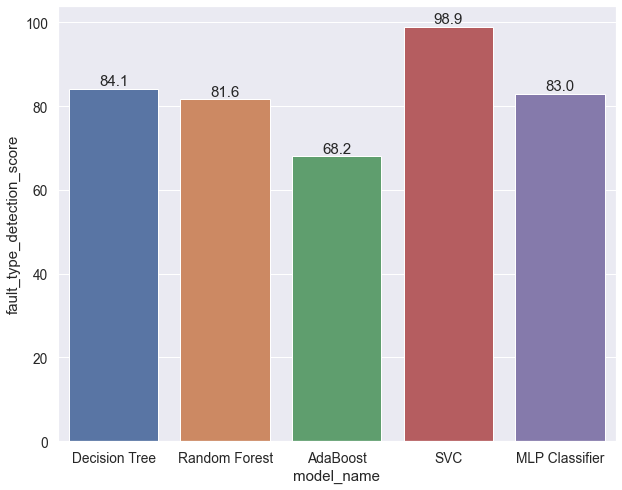

In [162]:
# Bar plot for Type of Fault Detection (classData)

fig, ax = plt.subplots(figsize=(10, 8))
ax = sns.barplot(x="model_name", y="fault_type_detection_score", data=df)
show_values(ax)

# <center>Conclusion</center>
### <center> After analysis of both fault detection and fault type detection data, we have clearly depicted that, SVC Model has done the best performance among all models which have been applied here. </center>

## <center> ---------------------------------- THANK YOU ---------------------------------- </center>